<a href="https://colab.research.google.com/github/Nithin-Pranav/AI-PriceOptima/blob/main/Dynamic_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
 df = pd.read_csv('/content/dynamic_pricing.csv')

In [31]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [32]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [33]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1000, 10)


In [34]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [35]:
df.dtypes

,0
Number_of_Riders,int64
Number_of_Drivers,int64
Location_Category,object
Customer_Loyalty_Status,object
Number_of_Past_Rides,int64
Average_Ratings,float64
Time_of_Booking,object
Vehicle_Type,object
Expected_Ride_Duration,int64
Historical_Cost_of_Ride,float64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [37]:
df.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [38]:
df.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [39]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)

Duplicate rows: 0


In [40]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
    print(f"\nUnique values for {col}: {df[col].unique()}")
    print(f"Value counts for {col}:\n{df[col].value_counts()}")


Unique values for Location_Category: ['urban' 'suburban' 'rural']
Value counts for Location_Category:
Location_Category
urban       346
rural       332
suburban    322
Name: count, dtype: int64

Unique values for Customer_Loyalty_Status: ['silver' 'regular' 'gold']
Value counts for Customer_Loyalty_Status:
Customer_Loyalty_Status
silver     367
regular    320
gold       313
Name: count, dtype: int64

Unique values for Time_of_Booking: ['night' 'evening' 'afternoon' 'morning']
Value counts for Time_of_Booking:
Time_of_Booking
night        276
afternoon    247
morning      246
evening      231
Name: count, dtype: int64

Unique values for Vehicle_Type: ['premium' 'economy']
Value counts for Vehicle_Type:
Vehicle_Type
premium    522
economy    478
Name: count, dtype: int64


In [41]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_pct = (outliers / len(df)) * 100
    print(f"{col}: {outliers} outliers ({outlier_pct:.2f}%)")

Number_of_Riders: 0 outliers (0.00%)
Number_of_Drivers: 10 outliers (1.00%)
Number_of_Past_Rides: 0 outliers (0.00%)
Average_Ratings: 0 outliers (0.00%)
Expected_Ride_Duration: 0 outliers (0.00%)
Historical_Cost_of_Ride: 0 outliers (0.00%)


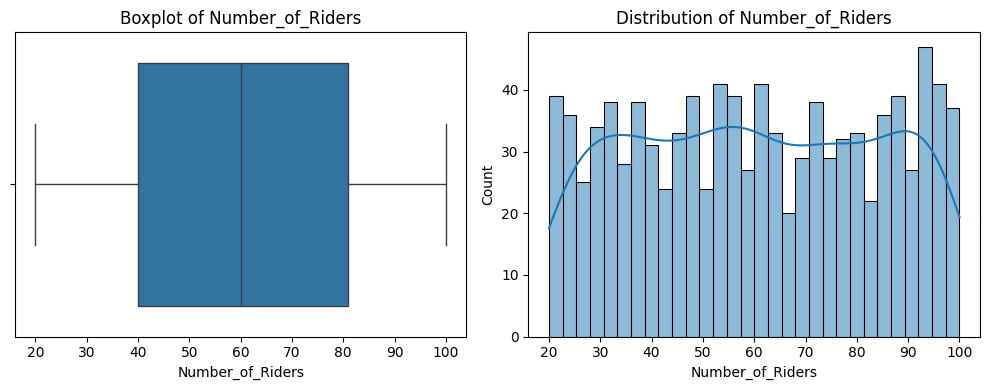

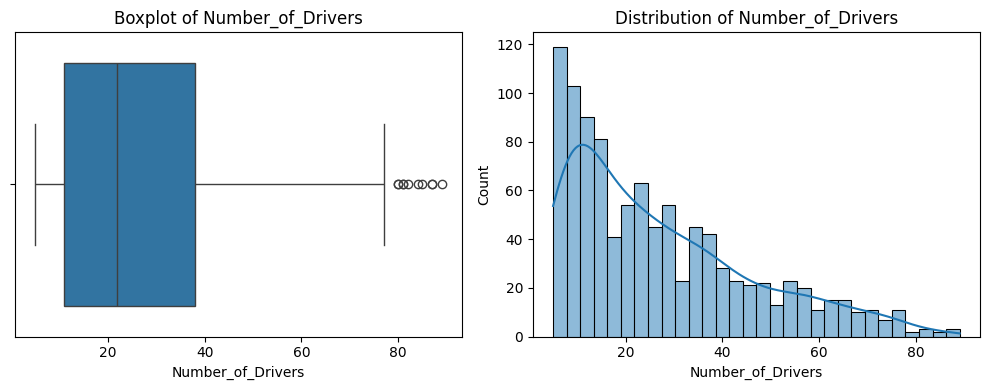

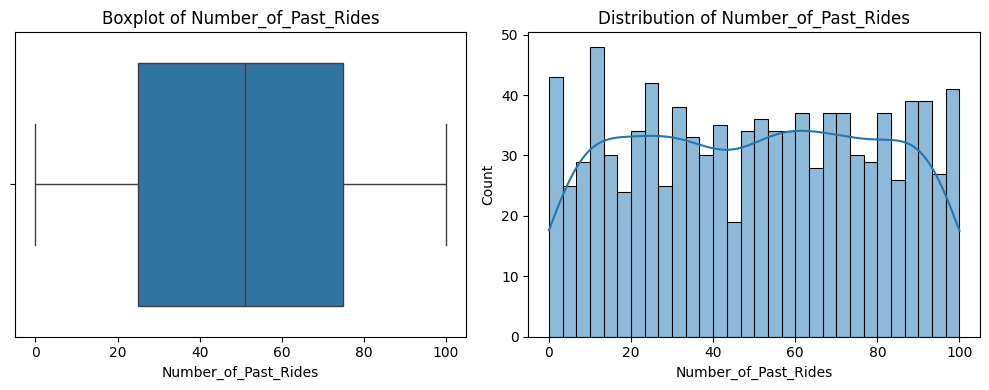

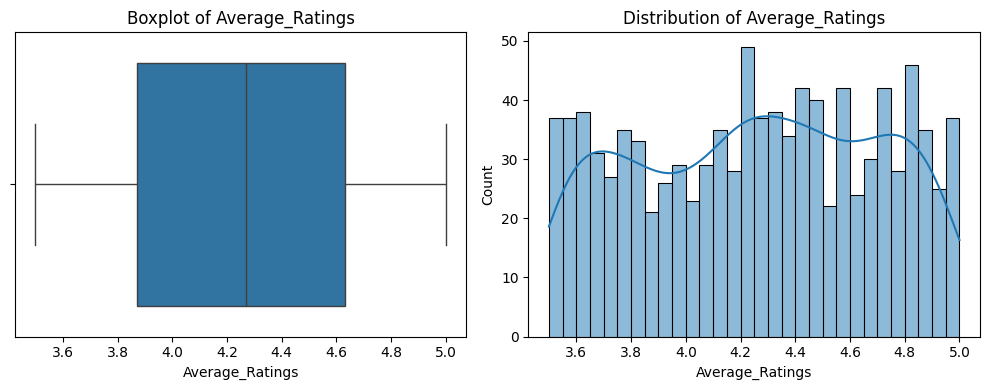

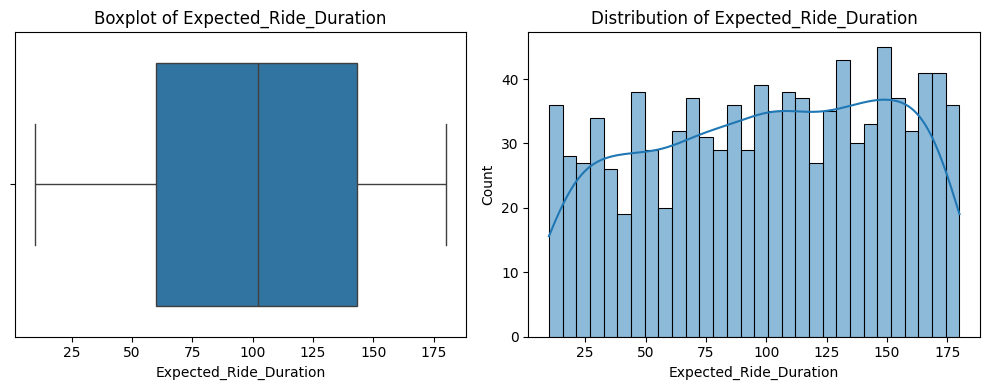

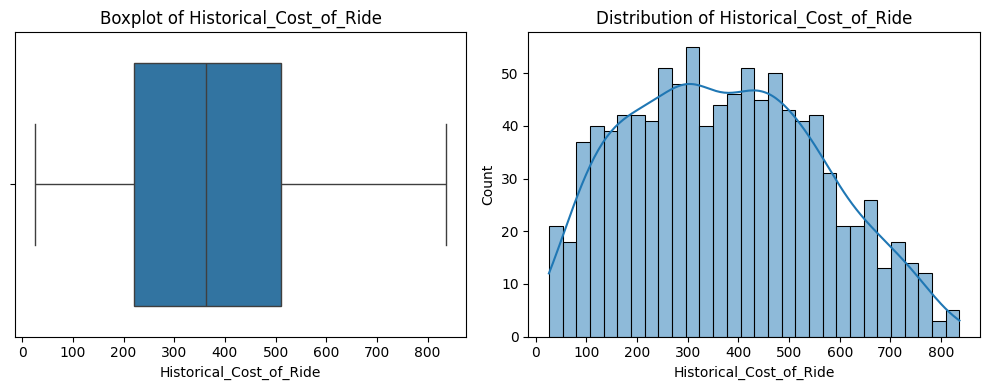

In [42]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

    plt.tight_layout()
    plt.show()

In [43]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
print(corr)

                         Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Number_of_Past_Rides  Average_Ratings  \
Number_of_Riders                     0.029265         0.008572   
Number_of_Drivers                    0.039660         0.041204   
Number_of_Past_Rides                 1.000000        -0.064734   
Average_Ratings                     -0.064734         1.000000   
Expected_Ride_Duration               0.030679        -0.016968   
Historical_Cost_of_Ride              0.035859        -0.001063   

                         Expected_Ride_Duration  Historical_Cost_of_Ride  
Number_of_Rid

In [44]:
target = "Historical_Cost_of_Ride"
if target in corr.columns:
    print(f"\nCorrelation with the target variable '{target}':")
    print(corr[target].sort_values(ascending=False))


Correlation with the target variable 'Historical_Cost_of_Ride':
Historical_Cost_of_Ride    1.000000
Expected_Ride_Duration     0.927547
Number_of_Past_Rides       0.035859
Number_of_Drivers          0.017082
Number_of_Riders           0.005826
Average_Ratings           -0.001063
Name: Historical_Cost_of_Ride, dtype: float64


In [45]:
for col in ["Location_Category", "Customer_Loyalty_Status", "Vehicle_Type", "Time_of_Booking"]:
    if col in df.columns:
        print(f"\nAnalysis by {col}:")
        print(df.groupby(col)[target].agg(["count", "mean", "median", "std"]).sort_values("mean", ascending=False))


Analysis by Location_Category:
                   count        mean      median         std
Location_Category                                           
rural                332  379.942172  367.756592  187.224517
suburban             322  374.319486  362.699542  187.343980
urban                346  363.673259  359.955839  187.106320

Analysis by Customer_Loyalty_Status:
                         count        mean      median         std
Customer_Loyalty_Status                                           
regular                    320  380.125251  358.951011  189.611633
gold                       313  376.118746  373.975636  184.967070
silver                     367  362.772140  348.669562  186.956263

Analysis by Vehicle_Type:
              count        mean      median         std
Vehicle_Type                                           
premium         522  396.246242  397.587527  184.316822
economy         478  346.573399  331.230917  186.987292

Analysis by Time_of_Booking:
         

In [46]:
print("\nSkewness of Numerical Features:")
for col in numeric_cols:
    print(f"{col}: {df[col].skew():.2f}")


Skewness of Numerical Features:
Number_of_Riders: 0.00
Number_of_Drivers: 0.96
Number_of_Past_Rides: -0.01
Average_Ratings: -0.08
Expected_Ride_Duration: -0.14
Historical_Cost_of_Ride: 0.21


In [47]:
df["Effective_Rides"] = df[["Number_of_Riders", "Number_of_Drivers"]].min(axis=1)

In [48]:
df["Revenue"] = df["Historical_Cost_of_Ride"] * df["Effective_Rides"]

In [49]:
driver_payout_rate = 0.7
df["Cost"] = df["Historical_Cost_of_Ride"] * driver_payout_rate
df["Profit"] = (df["Historical_Cost_of_Ride"] - df["Cost"]) * df["Effective_Rides"]
df["Gross_Margin"] = ((df["Revenue"] - (df["Cost"] * df["Effective_Rides"])) / df["Revenue"]) * 100

In [50]:
df["Conversion_Rate"] = (df["Effective_Rides"] / df["Number_of_Riders"]) * 100

In [51]:
df["Cancelled_Rides"] = df["Number_of_Riders"] - df["Effective_Rides"]
df["Cancellation_Rate"] = (df["Cancelled_Rides"] / df["Number_of_Riders"]) * 100